In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

In [2]:
# Custom Metrics
def mean_bias_error(y_true, y_pred):
    return np.mean(y_pred - y_true)


def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10
    return (
        np.mean(
            2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + epsilon)
        )
        * 100
    )


def rmae(y_true, y_pred, naive_forecast):
    return mean_absolute_error(y_true, y_pred) / mean_absolute_error(
        y_true, naive_forecast
    )

In [3]:
results_df = pd.read_csv("results/combined_asinh_results.csv", parse_dates=["ds"])
print(results_df.shape)
print(results_df.info())
results_df.head()

(3360, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   ds       3360 non-null   datetime64[ns]
 1   y        3360 non-null   float64       
 2   LSTM     3360 non-null   float64       
 3   Naive    3360 non-null   float64       
 4   week     3360 non-null   object        
 5   KAN      3360 non-null   float64       
 6   SARIMAX  3360 non-null   float64       
 7   state    3360 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 210.1+ KB
None


,ds,y,LSTM,Naive,week,KAN,SARIMAX,state
0,2025-03-01 00:00:00,118.817500,90.582650,81.728333,Week 1,94.33921,118.096894,NSW
1,2025-03-01 01:00:00,133.895833,88.388920,72.658333,Week 1,94.14290,112.701508,NSW
2,2025-03-01 02:00:00,117.473333,86.957880,60.095833,Week 1,93.51613,107.096094,NSW
3,2025-03-01 03:00:00,121.251667,88.848160,57.752500,Week 1,91.33111,107.200986,NSW
4,2025-03-01 04:00:00,127.117500,87.489006,58.972500,Week 1,96.20010,103.421238,NSW


In [5]:
# Calculate overall metrics (excluding rMAE)
overall_all_states = (
    results_df.groupby("state")
    .apply(
        lambda df: pd.Series(
            {
                # "Naive_MAE": mean_absolute_error(df["y"], df["Naive"]),
                "SARIMAX_MAE": mean_absolute_error(df["y"], df["SARIMAX"]),
                "LSTM_MAE": mean_absolute_error(df["y"], df["LSTM"]),
                "KAN_MAE": mean_absolute_error(df["y"], df["KAN"]),
                # # "Naive_RMSE": root_mean_squared_error(df["y"], df["Naive"]),
                "SARIMAX_RMSE": root_mean_squared_error(df["y"], df["SARIMAX"]),
                "LSTM_RMSE": root_mean_squared_error(df["y"], df["LSTM"]),
                "KAN_RMSE": root_mean_squared_error(df["y"], df["KAN"]),
                # # "Naive_MBE": mean_bias_error(df["y"], df["Naive"]),
                "SARIMAX_MBE": mean_bias_error(df["y"], df["SARIMAX"]),
                "LSTM_MBE": mean_bias_error(df["y"], df["LSTM"]),
                "KAN_MBE": mean_bias_error(df["y"], df["KAN"]),
                # "Naive_SMAPE": symmetric_mean_absolute_percentage_error(
                # df["y"], df["Naive"]
                # ),
                "SARIMAX_SMAPE": symmetric_mean_absolute_percentage_error(
                    df["y"], df["SARIMAX"]
                ),
                "LSTM_SMAPE": symmetric_mean_absolute_percentage_error(
                    df["y"], df["LSTM"]
                ),
                "KAN_SMAPE": symmetric_mean_absolute_percentage_error(
                    df["y"], df["KAN"]
                ),
            }
        )
    )
    .reset_index()
)
overall_all_states.to_csv("overall_all_states_asinh.csv", index=False)
overall_all_states.round(2)

C:\Users\Srira\AppData\Local\Temp\ipykernel_13032\927251084.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


,state,SARIMAX_MAE,LSTM_MAE,KAN_MAE,SARIMAX_RMSE,LSTM_RMSE,KAN_RMSE,SARIMAX_MBE,LSTM_MBE,KAN_MBE,SARIMAX_SMAPE,LSTM_SMAPE,KAN_SMAPE
0,NSW,62.30,37.29,38.28,182.27,157.91,177.79,-37.87,-17.03,-18.44,76.18,47.57,46.08
1,QLD,34.36,22.02,28.75,61.96,52.50,58.13,1.48,1.87,-0.20,52.54,39.64,50.84
2,SA,29.70,33.14,37.36,40.38,42.09,49.91,-5.77,-16.63,12.40,52.07,63.20,66.63
3,TAS,24.72,31.59,37.33,33.80,40.87,48.21,2.41,5.28,19.90,30.55,38.36,38.95
4,VIC,31.03,27.49,27.37,38.66,34.52,35.14,-1.17,10.10,2.68,65.44,60.98,64.65


In [5]:
overall_across_all = (
    results_df.groupby("week")
    .apply(
        lambda df: pd.Series(
            {
                # "Naive_MAE": mean_absolute_error(df["y"], df["Naive"]),
                "SARIMAX_MAE": mean_absolute_error(df["y"], df["SARIMAX"]),
                "LSTM_MAE": mean_absolute_error(df["y"], df["LSTM"]),
                "KAN_MAE": mean_absolute_error(df["y"], df["KAN"]),
                # # "Naive_RMSE": root_mean_squared_error(df["y"], df["Naive"]),
                "SARIMAX_RMSE": root_mean_squared_error(df["y"], df["SARIMAX"]),
                "LSTM_RMSE": root_mean_squared_error(df["y"], df["LSTM"]),
                "KAN_RMSE": root_mean_squared_error(df["y"], df["KAN"]),
                # # "Naive_MBE": mean_bias_error(df["y"], df["Naive"]),
                "SARIMAX_MBE": mean_bias_error(df["y"], df["SARIMAX"]),
                "LSTM_MBE": mean_bias_error(df["y"], df["LSTM"]),
                "KAN_MBE": mean_bias_error(df["y"], df["KAN"]),
                # "Naive_SMAPE": symmetric_mean_absolute_percentage_error(
                # df["y"], df["Naive"]
                # ),
                "SARIMAX_SMAPE": symmetric_mean_absolute_percentage_error(
                    df["y"], df["SARIMAX"]
                ),
                "LSTM_SMAPE": symmetric_mean_absolute_percentage_error(
                    df["y"], df["LSTM"]
                ),
                "KAN_SMAPE": symmetric_mean_absolute_percentage_error(
                    df["y"], df["KAN"]
                ),
            }
        )
    )
    .reset_index()
)

# overall_across_all.to_csv("overall_across_all.csv", index=False)
overall_across_all.round(2)

C:\Users\Srira\AppData\Local\Temp\ipykernel_13172\2819293560.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


,week,SARIMAX_MAE,LSTM_MAE,KAN_MAE,SARIMAX_RMSE,LSTM_RMSE,KAN_RMSE,SARIMAX_MBE,LSTM_MBE,KAN_MBE,SARIMAX_SMAPE,LSTM_SMAPE,KAN_SMAPE
0,Week 1,44.36,32.24,32.76,61.04,41.52,43.23,12.19,4.44,8.02,75.71,68.48,73.21
1,Week 2,50.39,31.11,39.60,86.65,70.46,78.95,16.93,-3.83,-5.02,56.84,43.43,54.78
2,Week 3,55.02,38.70,45.34,147.94,140.81,157.32,1.92,-6.67,-1.94,63.81,52.17,60.81
3,Week 4,37.26,28.45,39.13,51.64,37.29,49.98,-7.07,-11.53,-8.09,58.52,48.62,65.99


In [6]:
weekly_performance = (
    results_df.groupby(["state", "week"])
    .apply(
        lambda df: pd.Series(
            {
                # "Naive_MAE": mean_absolute_error(df["y"], df["Naive"]),
                "SARIMAX_MAE": mean_absolute_error(df["y"], df["SARIMAX"]),
                "LSTM_MAE": mean_absolute_error(df["y"], df["LSTM"]),
                "KAN_MAE": mean_absolute_error(df["y"], df["KAN"]),
                # # "Naive_RMSE": root_mean_squared_error(df["y"], df["Naive"]),
                "SARIMAX_RMSE": root_mean_squared_error(df["y"], df["SARIMAX"]),
                "LSTM_RMSE": root_mean_squared_error(df["y"], df["LSTM"]),
                "KAN_RMSE": root_mean_squared_error(df["y"], df["KAN"]),
                # # "Naive_MBE": mean_bias_error(df["y"], df["Naive"]),
                "SARIMAX_MBE": mean_bias_error(df["y"], df["SARIMAX"]),
                "LSTM_MBE": mean_bias_error(df["y"], df["LSTM"]),
                "KAN_MBE": mean_bias_error(df["y"], df["KAN"]),
                # "Naive_SMAPE": symmetric_mean_absolute_percentage_error(
                # df["y"], df["Naive"]
                # ),
                "SARIMAX_SMAPE": symmetric_mean_absolute_percentage_error(
                    df["y"], df["SARIMAX"]
                ),
                "LSTM_SMAPE": symmetric_mean_absolute_percentage_error(
                    df["y"], df["LSTM"]
                ),
                "KAN_SMAPE": symmetric_mean_absolute_percentage_error(
                    df["y"], df["KAN"]
                ),
                "SARIMAX_rMAE": rmae(df["y"], df["SARIMAX"], df["Naive"]),
                "LSTM_rMAE": rmae(df["y"], df["LSTM"], df["Naive"]),
                "KAN_rMAE": rmae(df["y"], df["KAN"], df["Naive"]),
            }
        )
    )
    .reset_index()
)

# weekly_performance.to_csv("weekly_performance.csv", index=False)
weekly_performance.round(2)
weekly_performance.to_csv("asinh_weekly_performance.csv", index=False)

C:\Users\Srira\AppData\Local\Temp\ipykernel_13032\1118517404.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


In [7]:
weekly_performance

,state,week,SARIMAX_MAE,LSTM_MAE,KAN_MAE,SARIMAX_RMSE,LSTM_RMSE,KAN_RMSE,SARIMAX_MBE,LSTM_MBE,KAN_MBE,SARIMAX_SMAPE,LSTM_SMAPE,KAN_SMAPE,SARIMAX_rMAE,LSTM_rMAE,KAN_rMAE
0,NSW,Week 1,39.967902,35.916744,26.441994,50.051661,48.248901,37.997106,-36.763255,-27.483991,-11.496662,83.304110,74.439728,56.614290,1.070385,0.961890,0.708146
1,NSW,Week 2,38.005287,27.744809,34.570985,105.625876,100.365013,109.727665,-20.627347,-1.051785,-16.297636,52.318788,41.284791,48.110638,0.823495,0.601172,0.749081
2,NSW,Week 3,131.509456,68.105834,70.728153,342.024239,294.318648,334.797884,-122.876272,-32.687592,-46.948364,126.624912,51.806271,51.991077,1.532650,0.793725,0.824287
3,NSW,Week 4,39.736593,17.397862,21.375269,47.407725,26.792760,29.393320,28.769520,-6.902653,0.964917,42.459159,22.752172,27.623710,0.488261,0.213775,0.262647
4,QLD,Week 1,31.792484,19.976601,22.798792,39.610739,27.457225,31.552091,27.076696,4.517646,-6.016881,56.179520,46.787984,53.948700,1.118874,0.703037,0.802359
5,QLD,Week 2,45.266693,29.905353,34.881692,104.190595,94.308168,99.509450,-36.023194,0.065103,-10.363750,71.516772,52.657648,63.880138,1.262345,0.833966,0.972740
6,QLD,Week 3,28.710449,20.020603,30.655431,39.706924,28.204544,38.314546,-14.267128,0.088458,14.641682,48.522696,36.260418,54.257348,0.789663,0.550654,0.843158
7,QLD,Week 4,31.650375,18.182016,26.650781,36.810737,24.094441,33.954426,29.147341,2.794151,0.919997,33.951808,22.858885,31.267123,0.743509,0.427119,0.626062
8,SA,Week 1,30.485601,28.524372,29.653671,44.537886,38.192187,40.310057,-0.619731,0.677614,6.019425,64.071163,73.480816,72.098225,0.410728,0.384304,0.399519
9,SA,Week 2,32.870758,40.151359,46.045296,44.524547,51.088712,57.759528,-2.518920,-26.396945,7.209361,38.373762,58.344217,55.165797,0.340722,0.416189,0.477282


In [10]:
# Calculate metrics
overall_metrics = (
    results_df.groupby("state")
    .apply(
        lambda df: pd.Series(
            {
                "SARIMAX_MAE": mean_absolute_error(df["y"], df["SARIMAX"]),
                "LSTM_MAE": mean_absolute_error(df["y"], df["LSTM"]),
                "KAN_MAE": mean_absolute_error(df["y"], df["KAN"]),
                "SARIMAX_RMSE": root_mean_squared_error(df["y"], df["SARIMAX"]),
                "LSTM_RMSE": root_mean_squared_error(df["y"], df["LSTM"]),
                "KAN_RMSE": root_mean_squared_error(df["y"], df["KAN"]),
                "SARIMAX_SMAPE": symmetric_mean_absolute_percentage_error(
                    df["y"], df["SARIMAX"]
                ),
                "LSTM_SMAPE": symmetric_mean_absolute_percentage_error(
                    df["y"], df["LSTM"]
                ),
                "KAN_SMAPE": symmetric_mean_absolute_percentage_error(
                    df["y"], df["KAN"]
                ),
                "SARIMAX_MBE": mean_bias_error(df["y"], df["SARIMAX"]),
                "LSTM_MBE": mean_bias_error(df["y"], df["LSTM"]),
                "KAN_MBE": mean_bias_error(df["y"], df["KAN"]),
            }
        )
    )
    .reset_index()
)

# Reorganize the columns to match the format you want
metrics = ["MAE", "RMSE", "SMAPE", "MBE"]
models = ["SARIMAX", "LSTM", "KAN"]
formatted_data = {}

for metric in metrics:
    for model in models:
        formatted_data[f"{metric}_{model}"] = overall_metrics[f"{model}_{metric}"]

final_df = pd.DataFrame(formatted_data, index=overall_metrics["state"])
final_df = final_df.reindex(
    columns=[
        "MAE_SARIMAX",
        "MAE_LSTM",
        "MAE_KAN",
        "RMSE_SARIMAX",
        "RMSE_LSTM",
        "RMSE_KAN",
        "SMAPE_SARIMAX",
        "SMAPE_LSTM",
        "SMAPE_KAN",
        "MBE_SARIMAX",
        "MBE_LSTM",
        "MBE_KAN",
    ]
)

# Save the final formatted table
# final_df.to_excel("Overall_Performance_Table.xlsx", index=True)

# overall_metrics.round(2).to_csv("results/overall_metrics.csv", index=False)
overall_metrics.round(2)

C:\Users\Srira\AppData\Local\Temp\ipykernel_13172\648853979.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


,state,SARIMAX_MAE,LSTM_MAE,KAN_MAE,SARIMAX_RMSE,LSTM_RMSE,KAN_RMSE,SARIMAX_SMAPE,LSTM_SMAPE,KAN_SMAPE,SARIMAX_MBE,LSTM_MBE,KAN_MBE
0,NSW,74.53,42.86,41.82,174.16,164.01,178.61,82.84,53.34,56.29,2.37,-13.68,-25.13
1,QLD,38.89,24.33,41.06,69.30,54.30,68.95,61.21,45.40,77.27,-2.92,-4.97,-21.79
2,SA,60.25,40.96,51.73,81.86,50.82,64.45,75.95,70.70,79.64,22.01,-3.07,27.29
3,TAS,27.76,28.86,31.11,34.46,36.78,42.30,33.86,34.50,34.24,1.62,6.11,16.07
4,VIC,32.37,26.13,30.31,41.37,33.10,39.86,64.73,61.91,71.05,6.88,-6.38,-5.23


In [4]:
results_df.head()

,ds,y,LSTM,Naive,week,KAN,SARIMAX,state
0,2025-03-01 00:00:00,118.817500,95.081635,81.728333,Week 1,95.182110,127.086760,NSW
1,2025-03-01 01:00:00,133.895833,89.027340,72.658333,Week 1,91.208130,125.568496,NSW
2,2025-03-01 02:00:00,117.473333,85.998840,60.095833,Week 1,89.687485,125.606362,NSW
3,2025-03-01 03:00:00,121.251667,86.543260,57.752500,Week 1,93.598816,134.695700,NSW
4,2025-03-01 04:00:00,127.117500,85.884260,58.972500,Week 1,105.347230,133.617242,NSW


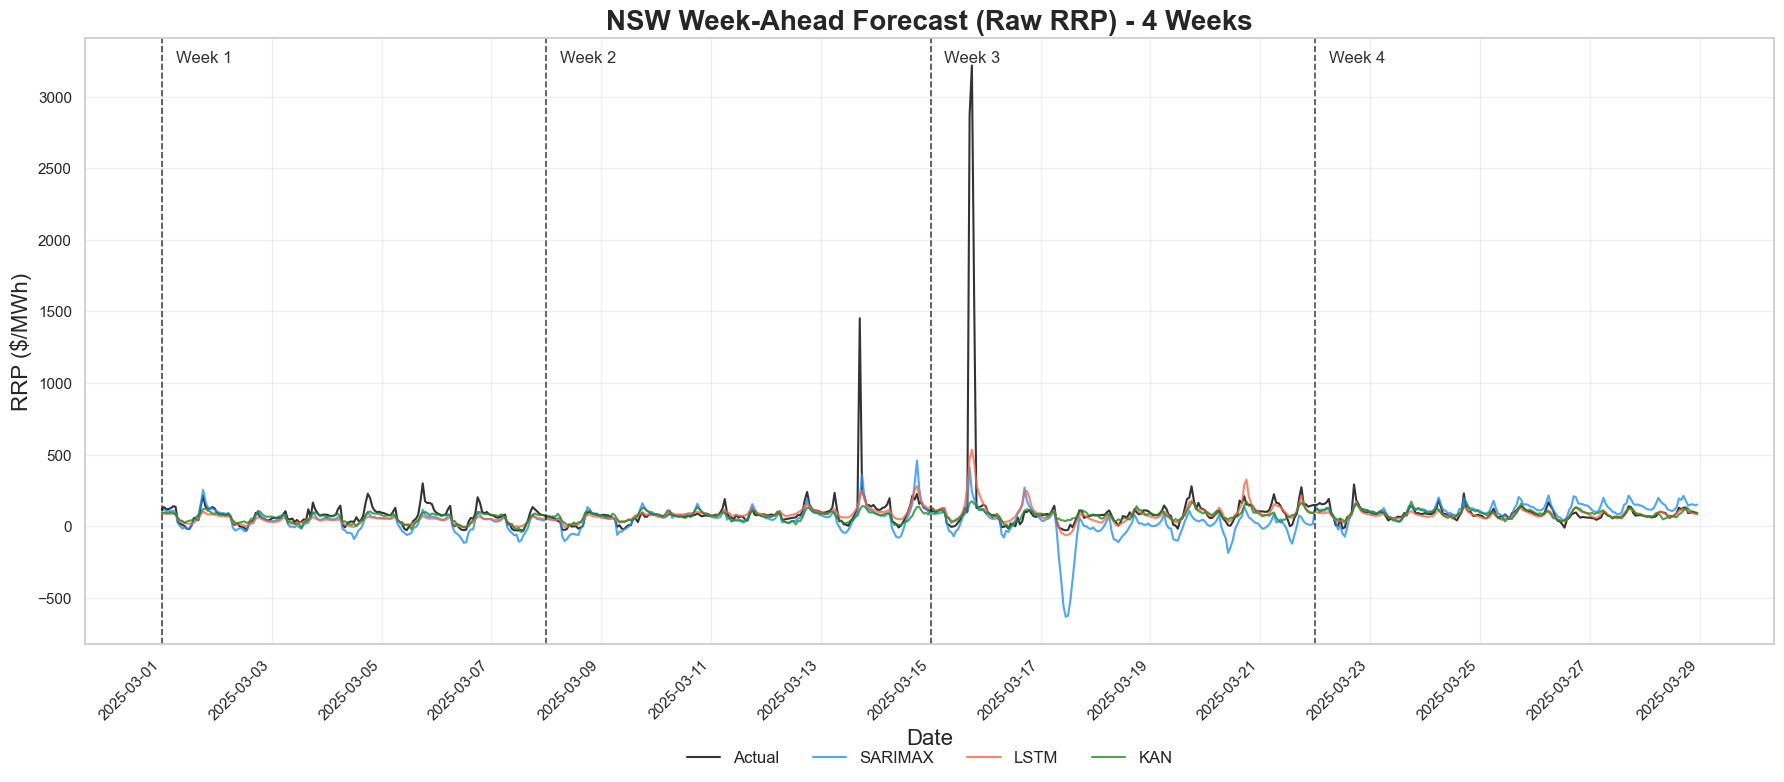

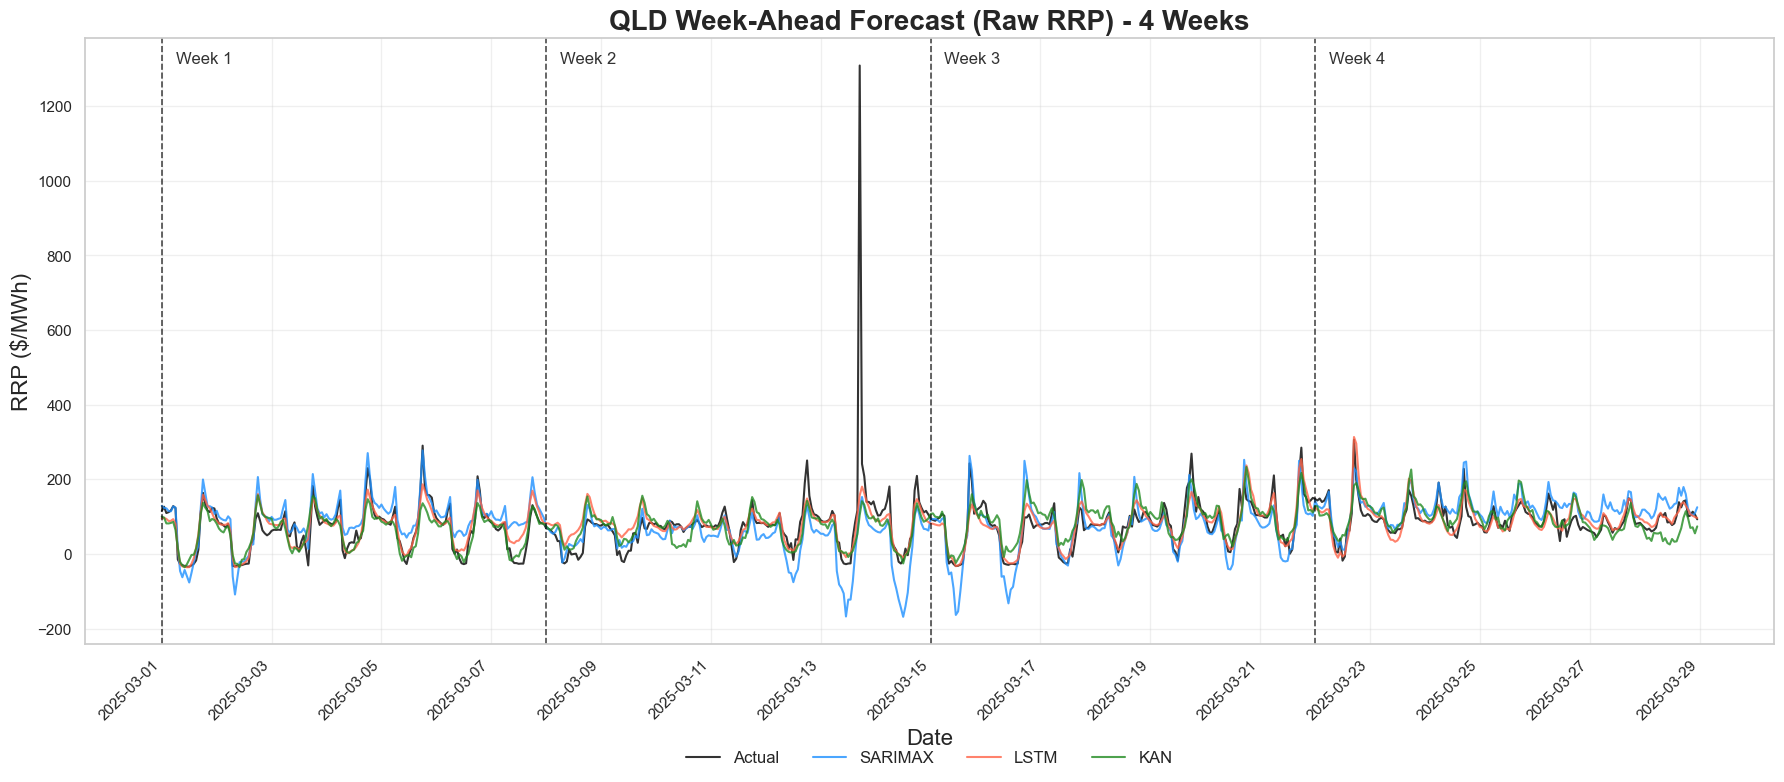

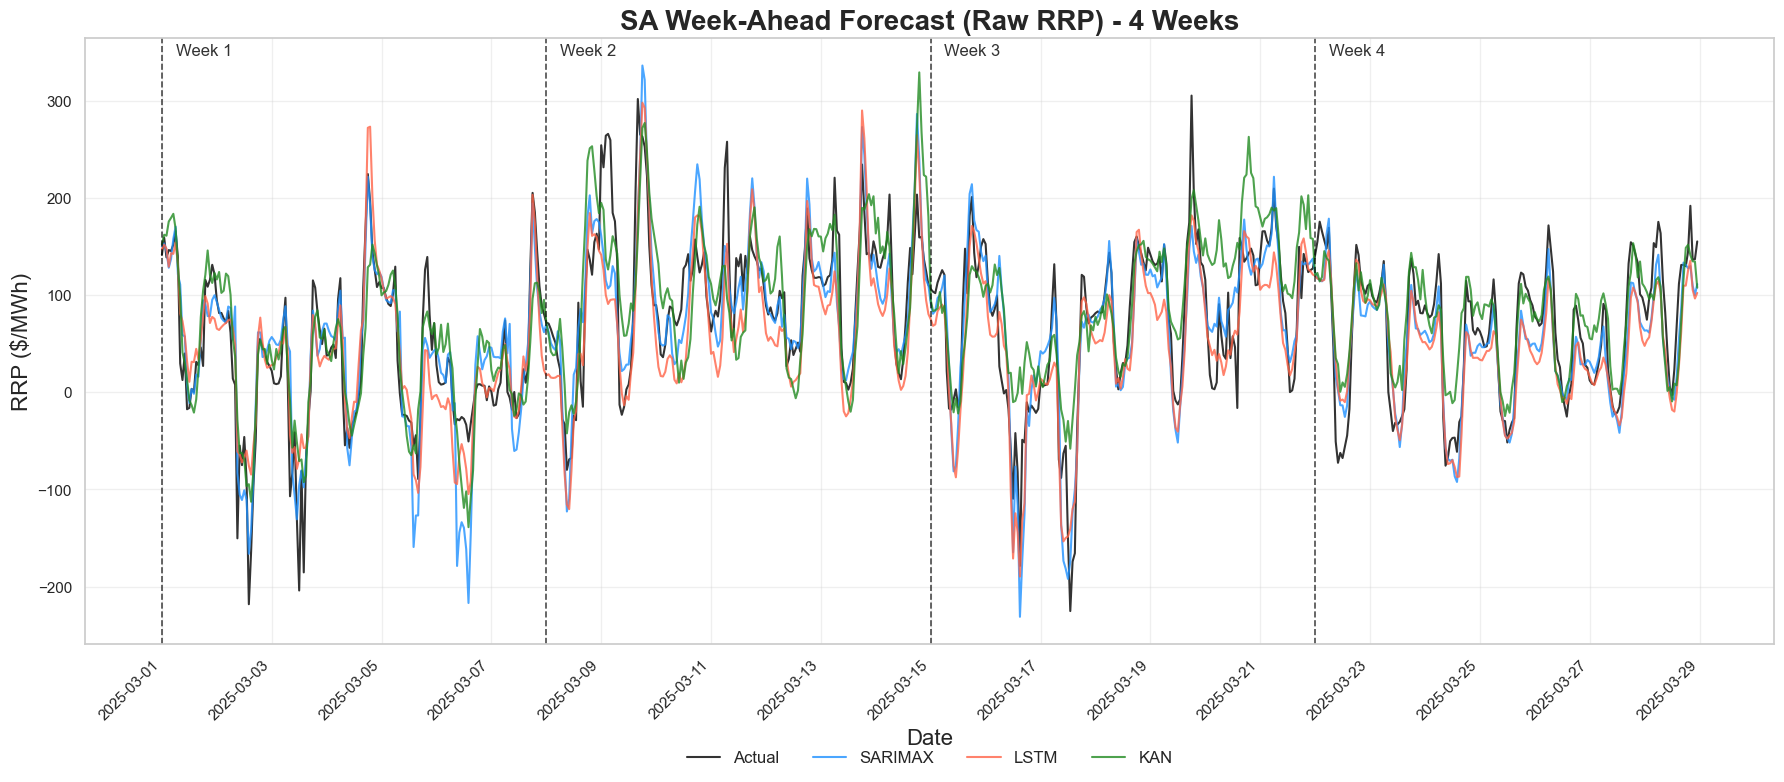

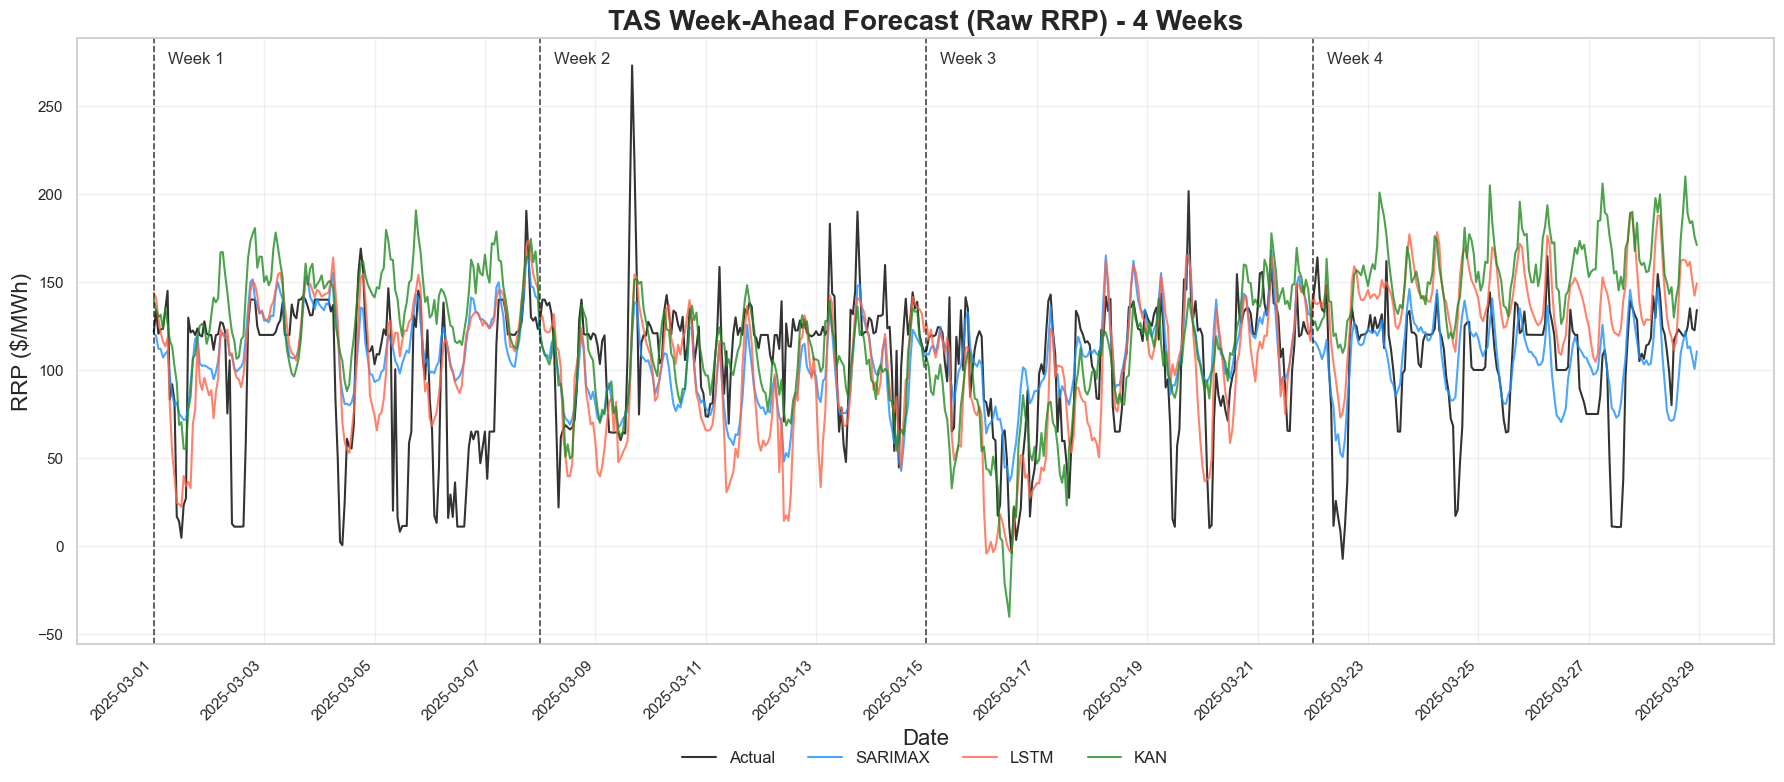

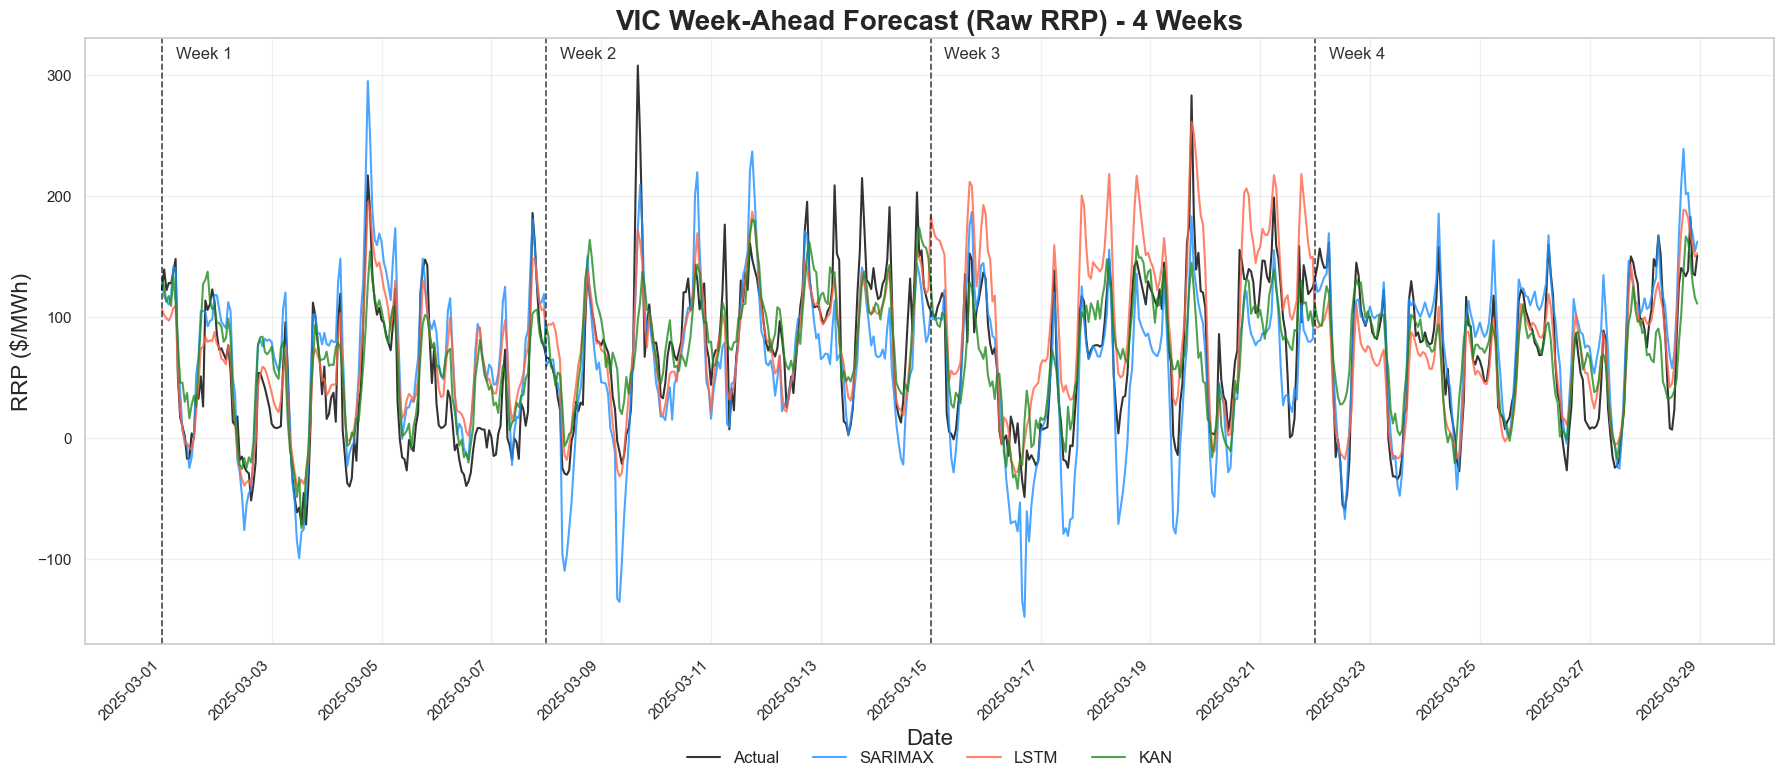

In [14]:
# state = "VIC"
for state in results_df["state"].unique():
    state_df = results_df[results_df["state"] == state]

    # Set Seaborn style for consistency
    sns.set_theme(style="whitegrid")

    # Create the plot
    plt.figure(figsize=(18, 8))

    # Plot actual prices
    plt.plot(
        state_df["ds"],
        state_df["y"],
        label="Actual",
        # drawstyle="steps-post",
        linewidth=1.5,
        color="black",
        alpha=0.8,
    )

    # Plot SARIMAX, LSTM, and KAN
    plt.plot(
        state_df["ds"],
        state_df["SARIMAX"],
        label="SARIMAX",
        # drawstyle="steps-post",
        linewidth=1.5,
        color="dodgerblue",
        alpha=0.8,
    )

    plt.plot(
        state_df["ds"],
        state_df["LSTM"],
        label="LSTM",
        # drawstyle="steps-post",
        linewidth=1.5,
        color="tomato",
        alpha=0.8,
    )

    plt.plot(
        state_df["ds"],
        state_df["KAN"],
        label="KAN",
        # drawstyle="steps-post",
        linewidth=1.5,
        color="forestgreen",
        alpha=0.8,
    )

    # Add vertical separators and week labels with spacing
    week_boundaries = state_df.groupby("week")["ds"].min().values
    weeks = state_df["week"].unique()

    for i, wb in enumerate(week_boundaries):
        plt.axvline(x=wb, color="black", linestyle="--", linewidth=1.2, alpha=0.7)
        # Add spacing to the right of each line for the week label
        plt.text(
            wb + pd.Timedelta(hours=6),  # Add a 6-hour offset for spacing
            plt.gca().get_ylim()[1] * 0.95,
            weeks[i],
            color="black",
            fontsize=12,
            ha="left",
            alpha=0.8,
            rotation=0,
        )

    # Add title and labels
    plt.title(
        f"{state} Week-Ahead Forecast (Raw RRP) - 4 Weeks",
        fontsize=20,
        fontweight="bold",
    )
    plt.xlabel("Date", fontsize=16)
    plt.ylabel("RRP ($/MWh)", fontsize=16)

    # Set date formatting for the x-axis
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    plt.xticks(rotation=45, ha="right")

    # Add grid with lighter color for better readability
    plt.grid(True, alpha=0.3)

    # Move legend outside the main plot area
    plt.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, -0.15),
        ncol=4,
        frameon=False,
        fontsize=12,
    )

    # Tight layout for better spacing
    plt.tight_layout()

    # Save the plot
    plt.savefig(f"./4_week_forecast_{state}.png", bbox_inches="tight", dpi=300)

    plt.show()

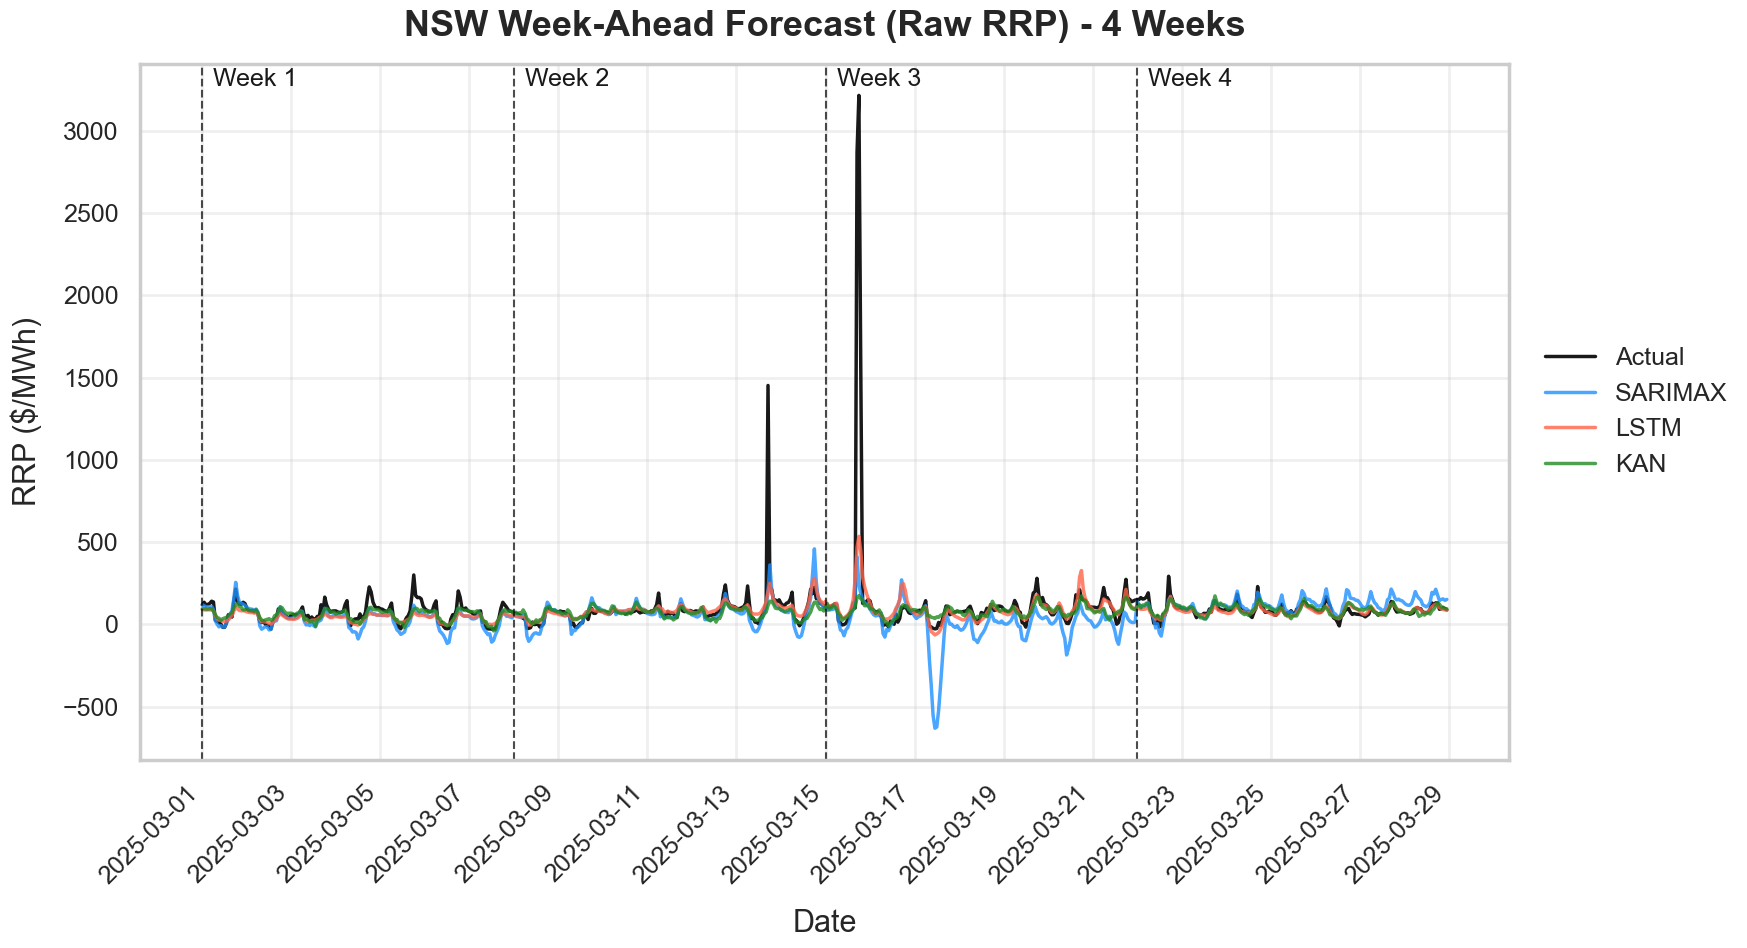

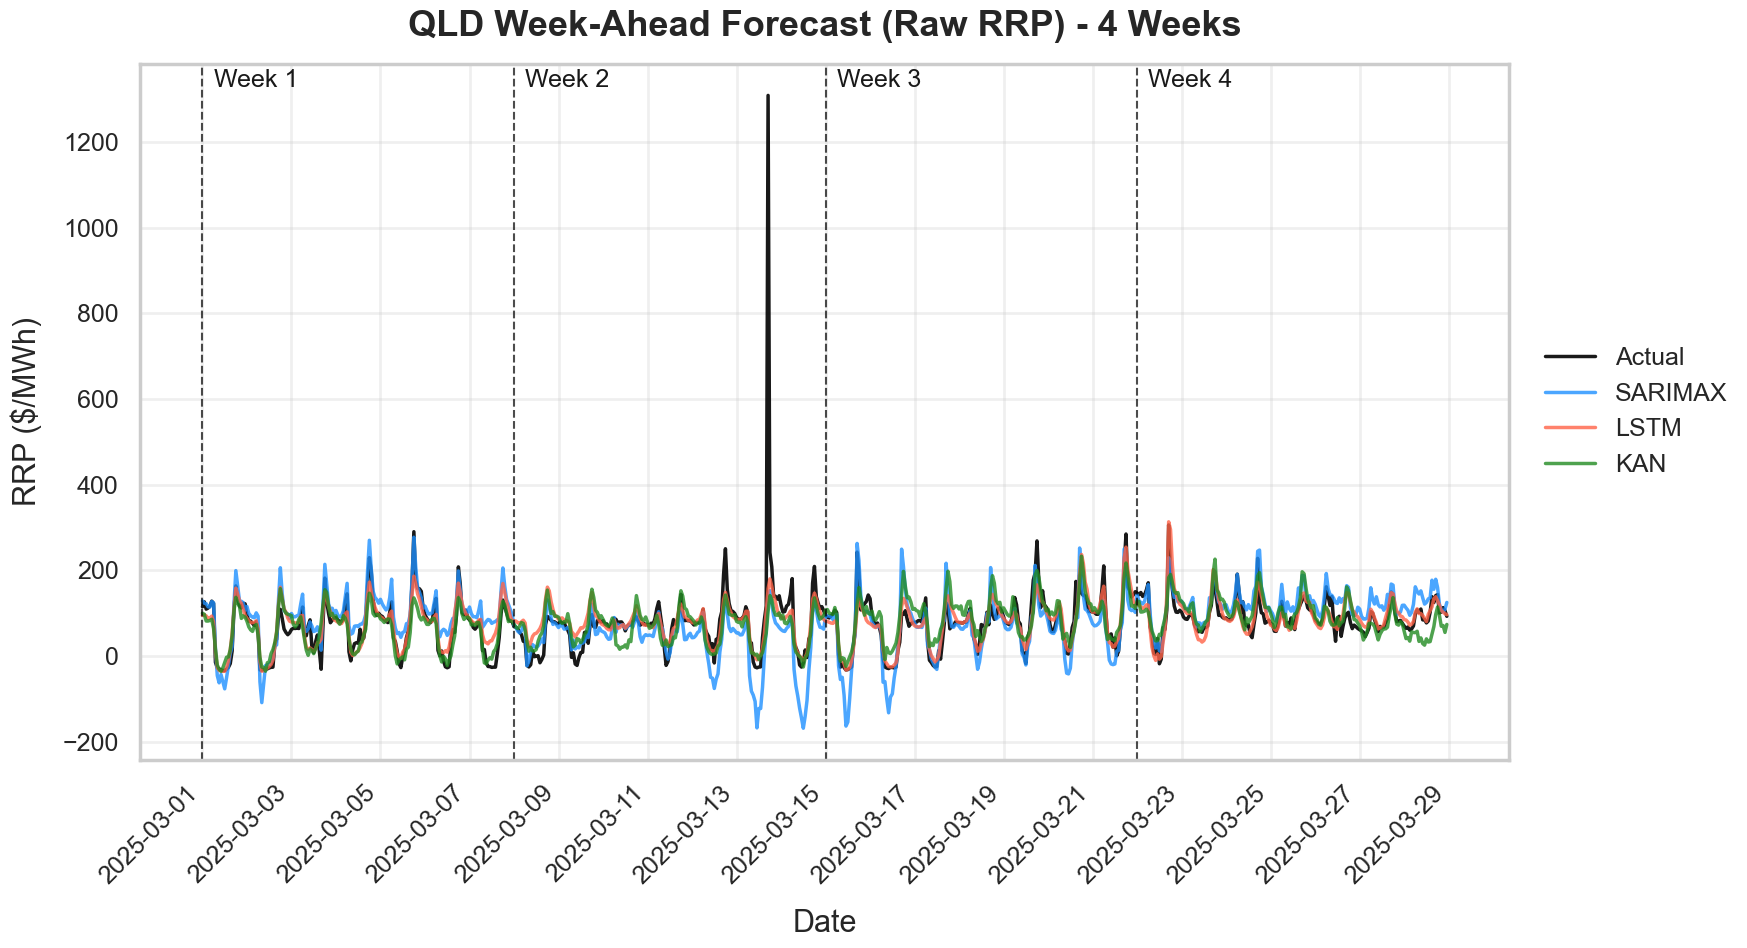

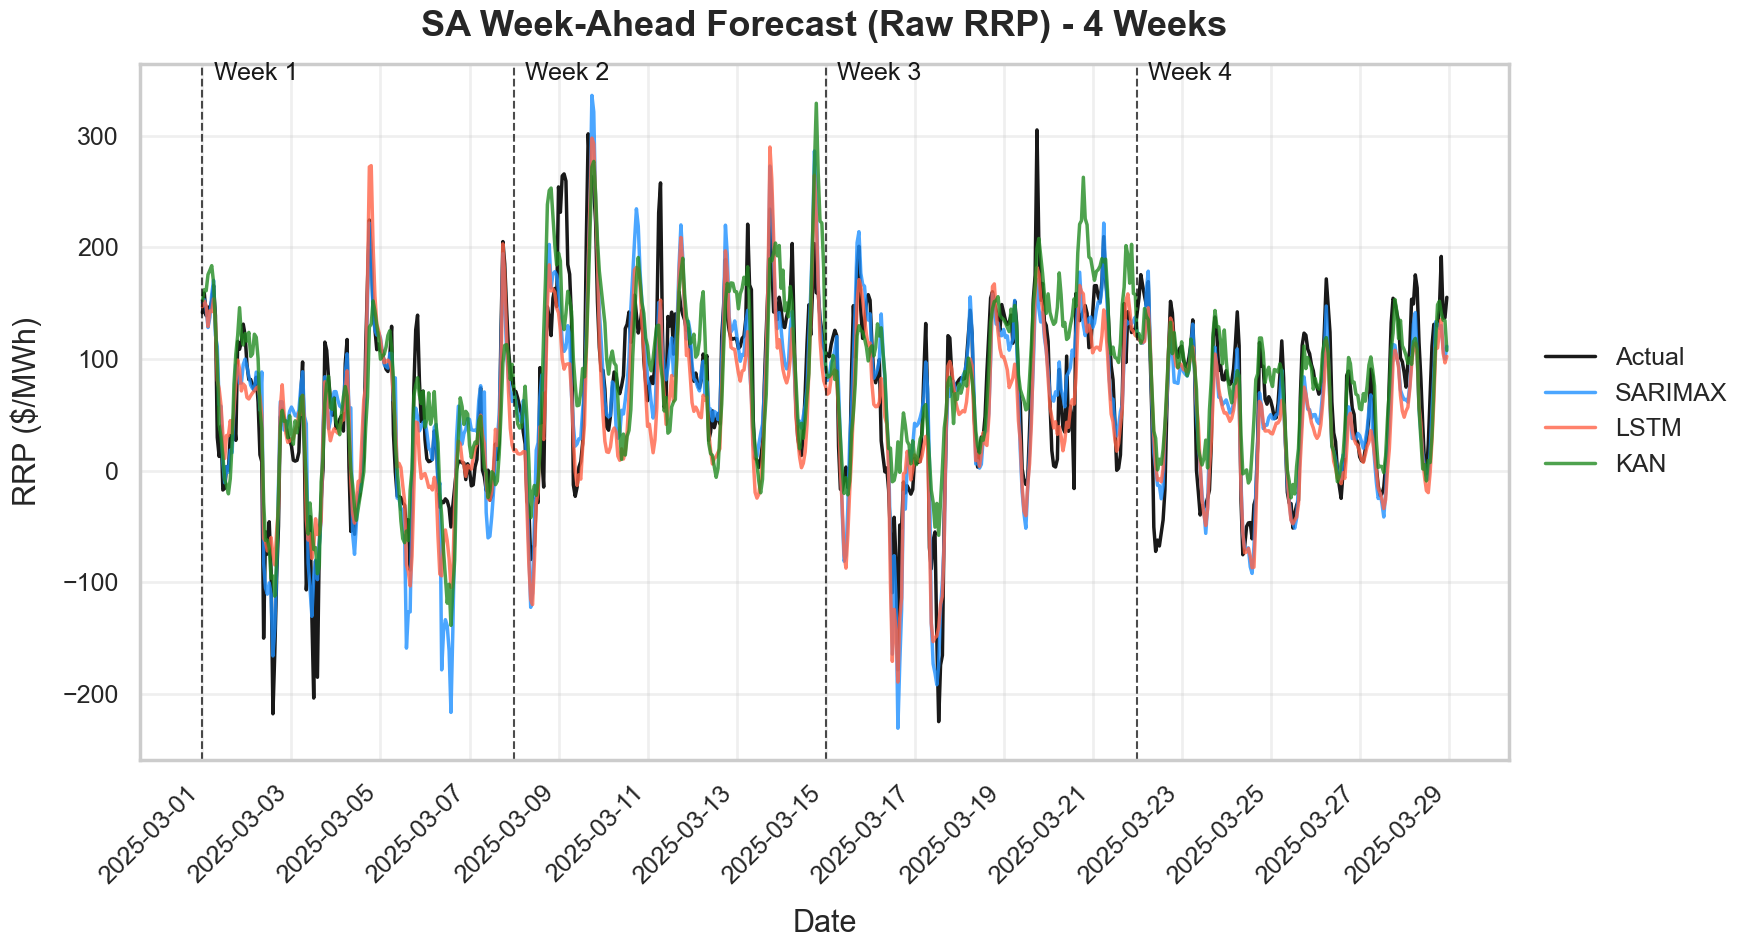

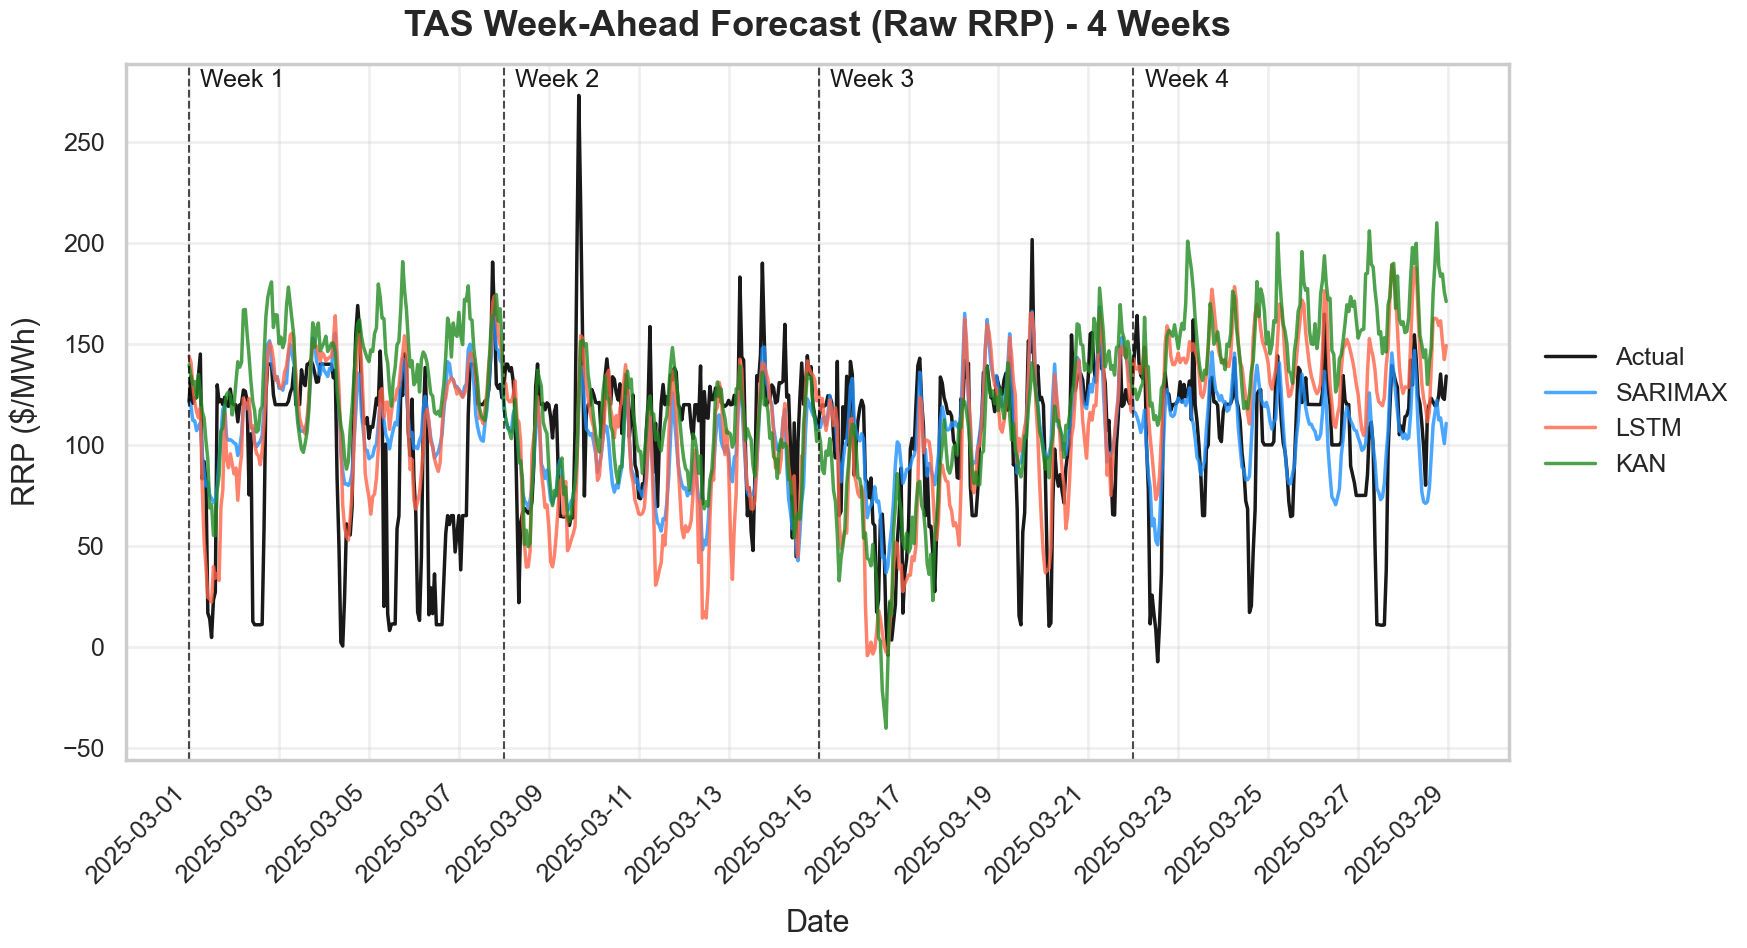

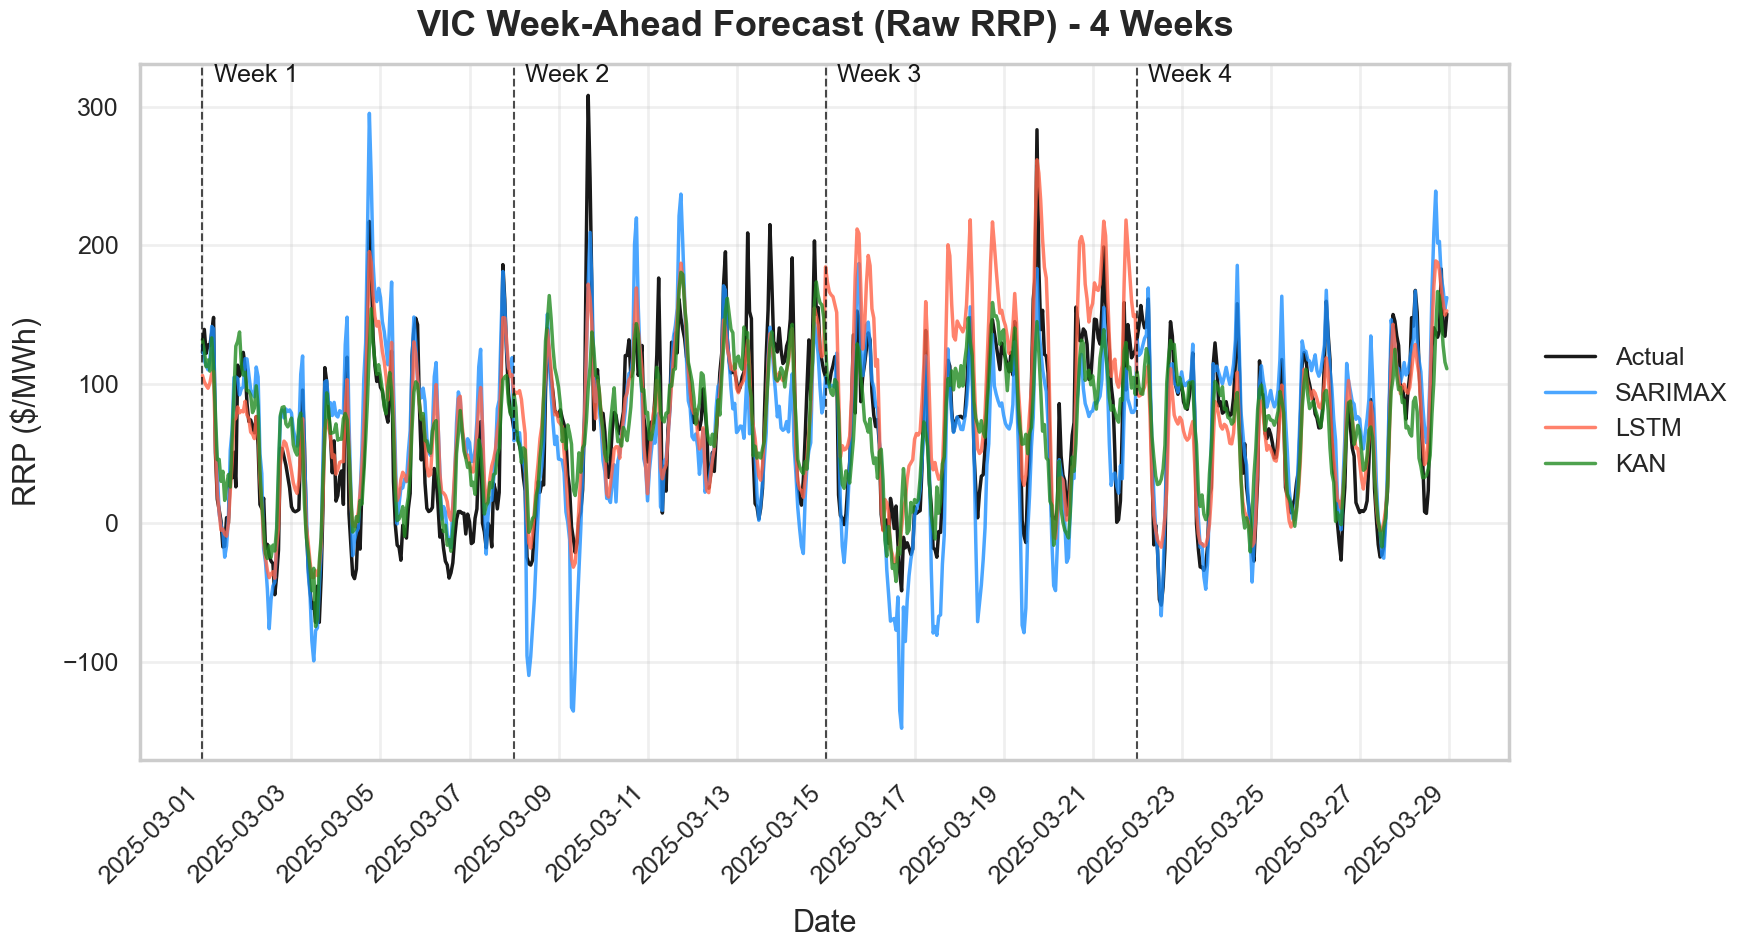

In [18]:
for state in results_df["state"].unique():
    state_df = results_df[results_df["state"] == state]

    # Set Seaborn theme and boost font scale
    sns.set_theme(style="whitegrid")
    sns.set_context("poster")  # Bigger than "talk"

    # Create the plot
    plt.figure(figsize=(18, 10))  # Slightly taller for better spacing

    # Plot actual prices
    plt.plot(
        state_df["ds"],
        state_df["y"],
        label="Actual",
        linewidth=2.5,
        color="black",
        alpha=0.9,
    )
    plt.plot(
        state_df["ds"],
        state_df["SARIMAX"],
        label="SARIMAX",
        linewidth=2.5,
        color="dodgerblue",
        alpha=0.8,
    )
    plt.plot(
        state_df["ds"],
        state_df["LSTM"],
        label="LSTM",
        linewidth=2.5,
        color="tomato",
        alpha=0.8,
    )
    plt.plot(
        state_df["ds"],
        state_df["KAN"],
        label="KAN",
        linewidth=2.5,
        color="forestgreen",
        alpha=0.8,
    )

    # Add vertical week separators and labels
    week_boundaries = state_df.groupby("week")["ds"].min().values
    weeks = state_df["week"].unique()

    for i, wb in enumerate(week_boundaries):
        plt.axvline(x=wb, color="black", linestyle="--", linewidth=1.5, alpha=0.7)
        plt.text(
            wb + pd.Timedelta(hours=6),
            plt.gca().get_ylim()[1] * 0.96,
            weeks[i],
            color="black",
            fontsize=18,  # Larger week label font
            ha="left",
            alpha=0.9,
        )

    # Title and axis labels
    plt.title(
        f"{state} Week-Ahead Forecast (Raw RRP) - 4 Weeks",
        fontsize=26,
        fontweight="bold",
        pad=20,
    )
    plt.xlabel("Date", fontsize=22, labelpad=15)
    plt.ylabel("RRP ($/MWh)", fontsize=22, labelpad=15)

    # Tick label sizes
    plt.xticks(fontsize=18, rotation=45, ha="right")
    plt.yticks(fontsize=18)

    # Format x-axis ticks
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

    # Grid
    plt.grid(True, alpha=0.3)

    # Legend (right side, large text)
    plt.legend(
        loc="center left", bbox_to_anchor=(1.01, 0.5), frameon=False, fontsize=18
    )

    # Layout and save
    plt.tight_layout()
    plt.savefig(f"./4_week_forecast_{state}.png", bbox_inches="tight", dpi=300)
    plt.show()